In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from IPython.display import HTML, display
import tabulate

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
f = [0.4905, 0.981, 1.4715, 1.962, 2.4525]

x1 = [0.035, 0.071, 0.117, 0.143, 0.179]

x2 = [0.055, 0.107, 0.161, 0.215, 0.267]

k1_raw = list(zip(f, x1))
k2_raw = list(zip(f, x2))

k_s_raw = [(0.4905, 0.087),
(0.981,  0.177),
(1.4715, 0.266)]

k_p_raw = [(0.2943, 0.015),
(0.7848, 0.035),
(1.2753, 0.056),
(1.7658, 0.076)]

In [65]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn

def flat(pairs):
    X, Y = [], []
    for x, y in pairs:
        X.append(x)
        Y.append(y)
    return (X, Y)

def reg(x, y):
    x, y = y, x
    (ar, br) = polyfit(x, y, 1)
    yr = polyval([ar, br], x)
    # compute the mean square error
    err = sqrt(sum((yr - y)**2)/len(x))
    print('Linear regression using polyfit')
    print('regression: a=%.2f b=%.2f, ms error= %.3f' % (ar, br, err))
    return {'m':ar, 'b':br, 'err':err}

def plot_with_reg(x, y, yerr, clr, legend):
    plt.errorbar(x=y, y=x, yerr=0, xerr=0, fmt=clr+'o')

    m, b = np.polyfit(y, x, 1)
    return plt.plot(y, np.add(np.multiply(m, y), b), clr+'--', label=legend)
        

In [67]:
k1 = reg(*flat(k1_raw))
k2 = reg(*flat(k2_raw))
k_s = reg(*flat(k_s_raw))
k_p = reg(*flat(k_p_raw))

display(HTML(tabulate.tabulate([[*k1.keys()],
                                [*k1.values()],
                                [*k2.values()],
                                [*k_s.values()],
                                [*k_p.values()]
                               ], tablefmt='html')))

Linear regression using polyfit
regression: a=13.54 b=-0.00, ms error= 0.054
Linear regression using polyfit
regression: a=9.22 b=-0.01, ms error= 0.005
Linear regression using polyfit
regression: a=5.48 b=0.01, ms error= 0.001
Linear regression using polyfit
regression: a=24.04 b=-0.06, ms error= 0.005


m,b,err
13.541411042944787,-0.0045138036809822925,0.05433256488849004
9.219403617863195,-0.01282398247597437,0.005215429667237995
5.480389913029004,0.012797782031542167,0.0012917470095372132
24.04180682364248,-0.06385221047573263,0.0053761697876625655


In [73]:
4*3.14**2*(0.05)/(10.12/20)**2

7.701729444296896

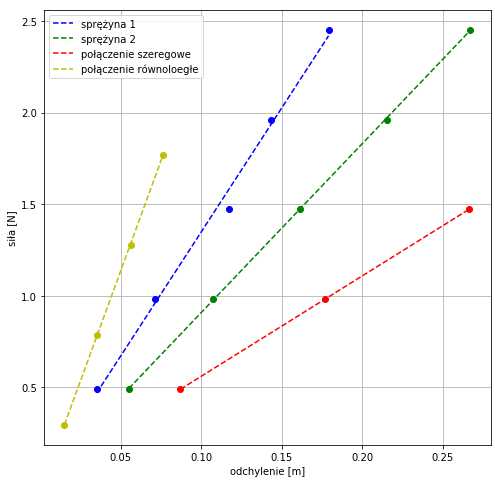

In [69]:
fig = plt.figure()
# ax = fig.gca()
# ax.set_yscale('log')

plt.ylabel('siła [N]')
plt.xlabel('odchylenie [m]')

p1 = plot_with_reg(*flat(k1_raw), k1['err'], 'b', 'sprężyna 1')
p2 = plot_with_reg(*flat(k2_raw), k2['err'], 'g', 'sprężyna 2')
p3 = plot_with_reg(*flat(k_s_raw), k_s['err'], 'r', 'połączenie szeregowe')
p4 = plot_with_reg(*flat(k_p_raw), k_s['err'], 'y', 'połączenie równoloegłe')

plt.legend()
plt.grid()
plt.show()

In [63]:
k1['m'] + k2['m']

22.76081466080798

In [64]:
1/(1/k1['m'] + 1/k2['m'])

5.485029240858728